#### <div style="text-align: right"> By Carlos Montes </div>
<div style="text-align: right"> December 2018 </div>

## History
Mathematician John Tukey first introduced these also known as “Box and Whisker Plot” in 1969 as a visual diagram of the “Five Number Summary” of any given data set. As Hadley Wickham describes, “Box plots use robust summary statistics that are always located at actual data points, are quickly computable (originally by hand), and have no tuning parameters. They are particularly useful for comparing distributions across groups.”

Today, over 40 years later, the boxplot has become one of the most frequently used statistical graphics, and is one of the few plot types invented in the 20th century that has found widespread adoption. Due to their elegance and practicality, boxplots have spawned a wealth of variations and enhancement. They have been used steadily since their introduction in 1969 and are varied in both their potential visualizations as well as use cases across many disciplines in statistics and data analysis. 


## Explanation
The Five Number Summary mentioned above includes:

- Minimum
- First Quartile
- Median (Second Quartile)
- Third Quartile
- Maximum

Quartiles are the three cut points that divide a dataset into four equal-sized groups. The median is the value which leaves the same number of samples on both sides of a given ordered dataset. (in the event of an even number of samples the median would be the mean of the two central value). By definition the median is the same as the second quartile since it leaves half of the values on every side and also one quartile on every side.

The term "box plot" comes from the fact that the graph looks like a rectangle with lines extending from the top and bottom. 
![box plot image commented](http://www.physics.csbsju.edu/stats/simple.box.defs.gif)

In a typical box plot, the top of the rectangle representes the third quartile, a horizontal line near the middle of the rectangle shows the median (which is the second quartile), and the bottom of the rectangle indicates the first quartile. A vertical line extends from the top of the rectangle to represent the maximum value, and another vertical line extends from the bottom of the rectangle to show the minimum value. 

A box plot can be placed on a coordinate plane resembling the Cartesian system, so that the five values, arranged vertically one above the other, run parallel to the dependent-variable or y axis. In some situations, two or more box plots can be placed side-by-side on a Cartesian coordinate plane to show how a phenomenon or scenario evolves with time, which is plotted along the independent-variable or x axis. Once in a while, a single box plot is tilted on its side, so the values run from left to right (minimum to maximum) instead of bottom-to-top.

They can show the outliers, if the data is symmetrical, how tightly the set is grouped, and if and how the data is skewed. They are a good indication of how the values in the data are spread out. Although box plots may seem primitive in comparison to a histogram or density plot, they have the advantage of taking up less space, which is useful when comparing distributions between many groups or datasets.

As an example I will show three different cases to output box plots using the popular Fisher's iris data set which is included in seaborn library:

In [1]:
# we import library and then the data set
import seaborn as sns
import matplotlib.pyplot as plt
# python magic command to make sure all the plots are displayed properly:
%matplotlib inline
df = sns.load_dataset('iris')

# show the first 5 lines of the data set itself:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


1) Taking one single numerical variable, all the 150 samples of the sepal length which belong to 3 different species of the setosa flower:

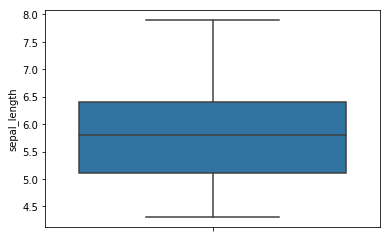

In [2]:
sns.boxplot(y=df["sepal_length"])
plt.show()

We can see that the minimum value is nearly 4.5 mm and the maximum roughly 8, being the median close to 6. Then the first quartile around 5.2 and the third 6.5. Now I'll calculate the exact values of these parameters through python:

In [3]:
# how to get the median with pandas
df["sepal_length"].median()

5.8

In [4]:
# how to get the first quartile -0.25- and the third quartile -0.75-
df.sepal_length.quantile([0.25, 0.75])

0.25    5.1
0.75    6.4
Name: sepal_length, dtype: float64

* Note that we could also get the median by including 0.5 within the above pair of square braces since the median is the second quartile by definition. The code would then be:

`df.sepal_length.quantile([0.25, 0.5, 0.75])`

On the other hand this plot doesn't show any outliers, reason why we'll look at the same parameter but focusing on just one of the species: virginica. We select the rows 100 to 149 where virginica is, and only take its values from the *sepal_length* column. With loc we can select cells by their index

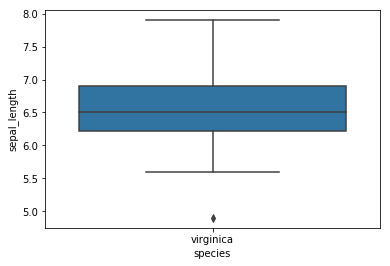

In [5]:
sns.boxplot( x=df.loc[100:149, "species"], y=df["sepal_length"] )
plt.show()

In [13]:
# And we find one outlier right above the x axis, whose value is 4.9:
min(df.loc[100:149, "sepal_length"])

4.9

Although, we might prefer to hide the outliers at times and we can do so by just adding `showfliers=False`

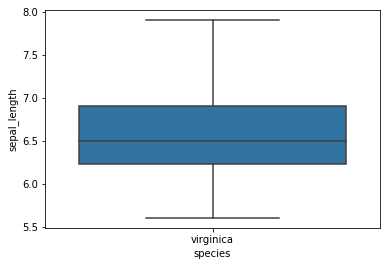

In [20]:
sns.boxplot( x=df.loc[100:149, "species"], y=df["sepal_length"], showfliers=False )
plt.show()

Also there is a possibility to make them bigger or smaller, with `markersize` being the default value 5, the smallest 0 and nearly not limited on the top size. Also `markerfacecolor` enables transparency, the value 0 is totally black (default) and 1 totally transparent being only visible its borders.

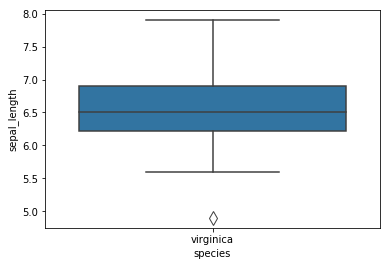

In [56]:
fliertweak = dict(markerfacecolor='', markersize=10)
sns.boxplot( x=df.loc[100:149, "species"], y=df["sepal_length"], flierprops=fliertweak )
plt.show()

But there are other features we can add to box plots like a confidence interval which is a type of interval estimate that might contain the true value of an unknown population parameter.
 
 In order to get this we need to add `notch=True` and two notches turn up on the sides of the box.
 
 The interval has an associated confidence level that quantifies the level of confidence that the parameter lies in the interval. Confidence intervals consist of a range of potential values of the unknown population parameter. The confidence level is designated prior to examining the data. Most commonly the 95% confidence level is used, and here it's the default one, but others can also be used like 90% and 99%.
 
 On the other hand we can also add the representation of every value to overlap a swarm plot. This is in the second line of the following script represented as *ax*:

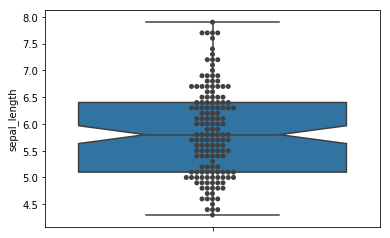

In [7]:
sns.boxplot( y=df["sepal_length"], notch=True )
ax = sns.swarmplot(y="sepal_length", data=df, color=".25")
plt.show()

2) Taking one numerical variable and several groups:

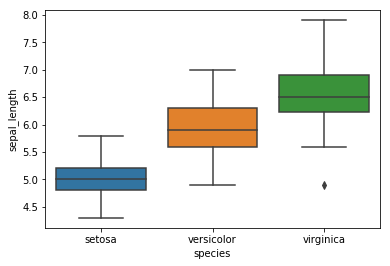

In [8]:
# we look at the same variable as before but in relation to every of the three species of flower
sns.boxplot( x=df["species"], y=df["sepal_length"] )
plt.show()

3) Taking several numerical variables:

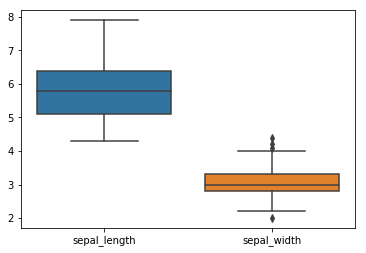

In [9]:
# we can visualize the values of two variables (columns in this case) one next to another (sepal lenght and sepal width)
sns.boxplot(data=df.iloc[:,0:2])
plt.show()

## References
- [www.chartio.com](https://chartio.com/resources/tutorials/what-is-a-box-plot/)
- [www.techtarget.com](https://whatis.techtarget.com/definition/box-plot)
- [www.towardsdatascience.com](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
- [www.python-graph-gallery.com](https://python-graph-gallery.com/30-basic-boxplot-with-seaborn/)

First look at the manual [demo](https://matplotlib.org/gallery/statistics/boxplot_demo.html)